In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import gzip
import io
from PIL import Image
import random

In [2]:
import numpy as np
from scipy.stats import ranksums
from multiprocessing import Pool, cpu_count

num_control_arrays = 400
num_cancer_arrays = 400
num_bins = 2000000

with open('test_sort.npy', 'rb') as f:
        cancer_arr = np.load(f)
        control_arr=np.load(f)
        
print(control_arr.shape,cancer_arr.shape)

(400, 2000000) (400, 2000000)


In [3]:
with open('cancer_names.txt','r') as f:
    cancer_names = [line.strip() for line in f]
with open('control_names.txt','r') as f:
    control_names=[line.strip() for line in f]
print(cancer_names,control_names)

['cancer_SRR16993515.bed.gz', 'cancer_SRR16995157.bed.gz', 'cancer_SRR16993788.bed.gz', 'cancer_SRR16993797.bed.gz', 'cancer_SRR17004200.bed.gz', 'cancer_SRR16994067.bed.gz', 'cancer_SRR16994348.bed.gz', 'cancer_SRR16994206.bed.gz', 'cancer_SRR16994406.bed.gz', 'cancer_SRR16993931.bed.gz', 'cancer_SRR16994852.bed.gz', 'cancer_SRR16994022.bed.gz', 'cancer_SRR17004844.bed.gz', 'cancer_SRR17004491.bed.gz', 'cancer_SRR16994379.bed.gz', 'cancer_SRR16994978.bed.gz', 'cancer_SRR16994762.bed.gz', 'cancer_SRR16993862.bed.gz', 'cancer_SRR17004630.bed.gz', 'cancer_SRR16993591.bed.gz', 'cancer_SRR16994932.bed.gz', 'cancer_SRR16995129.bed.gz', 'cancer_SRR17006198.bed.gz', 'cancer_SRR16993621.bed.gz', 'cancer_SRR16994339.bed.gz', 'cancer_SRR16993942.bed.gz', 'cancer_SRR17004085.bed.gz', 'cancer_SRR15505497.bed.gz', 'cancer_SRR16994035.bed.gz', 'cancer_SRR17004025.bed.gz', 'cancer_SRR16994401.bed.gz', 'cancer_SRR16995053.bed.gz', 'cancer_SRR16994764.bed.gz', 'cancer_SRR16994817.bed.gz', 'cancer_SRR16

In [4]:

    
training_con=control_arr[30:400]
training_can=cancer_arr[30:400]

testing_con=control_arr[:30]
testing_can=cancer_arr[:30]

test_con_names=control_names[:30]
test_can_names=cancer_names[:30]

# Function to perform Wilcoxon rank-sum test for a single bin
def ranksums_parallel(bin_index):
    return ranksums(training_con[:, bin_index], training_can[:, bin_index]).pvalue

# Number of processes for parallel processing (adjust based on your CPU cores)
num_processes = cpu_count()

# Perform Wilcoxon rank-sum test for each bin using parallel processing
with Pool(num_processes) as pool:
    p_values = pool.map(ranksums_parallel, range(num_bins))

# Convert p_values to a NumPy array for efficient vectorized operations
p_values = np.array(p_values)

# Adjust p-values for multiple comparisons (Bonferroni correction)
adjusted_alpha = 0.05  # 0.05 significance level divided by the number of bins
is_significant = p_values < adjusted_alpha

# Get the indices of significant bins
significant_bins_indices = np.where(is_significant)[0]

# Sort the p_values array in ascending order
# Sort the p_values array in ascending order
# Sort the p_values array in ascending order
sorted_p_values = np.sort(p_values)

# Find the indices of p_values that are below the adjusted_alpha (0.05)
significant_indices = np.where(sorted_p_values < adjusted_alpha)[0]

# Get the actual p-values for the significant bins
significant_p_values = sorted_p_values[significant_indices]

# Get the indices of the top x smallest significant p-values
top_x_indices = significant_indices[np.argsort(significant_p_values)[:10000]]

# Get the corresponding bin indices for the top 100 significant p-values
top_x_bin_indices = np.argsort(p_values)[top_x_indices]

# Now you can print or analyze the bin indices of the top 100 significant bins and their corresponding p-values
print(top_x_bin_indices[0:10])
print(significant_p_values[np.argsort(significant_p_values)[:10000]])

print(p_values[0:100])

[  93359   92824  231809   93778 1665663 1170003 1170523 1479103 1860525
 1739626]
[3.66157660e-16 1.38011613e-14 1.94242054e-13 ... 1.99274036e-03
 1.99389488e-03 1.99389488e-03]
[9.99725577e-01 2.05500656e-01 1.46233512e-01 6.81825204e-01
 5.94200064e-01 4.65911170e-01 6.71761816e-01 1.78590750e-02
 3.43009189e-01 7.06589945e-01 5.82349280e-01 9.74483050e-01
 4.45345454e-01 1.46078565e-02 2.94886413e-01 4.43501853e-01
 7.45555564e-01 1.52986649e-01 1.41984186e-01 4.37591111e-01
 9.58169736e-01 6.32736558e-02 6.94865408e-01 7.47027330e-02
 4.28810546e-01 2.25169458e-01 9.65570657e-01 3.03208366e-01
 7.01483566e-01 5.22776274e-02 3.57555319e-01 6.52927813e-01
 6.31619123e-01 6.26856599e-01 9.55018549e-01 1.07478987e-01
 2.40175886e-01 8.87043455e-01 8.85685281e-01 5.30547535e-01
 2.34598564e-02 9.98765099e-01 3.07835036e-01 4.25007736e-01
 4.87748480e-01 7.03014077e-01 4.65175218e-01 9.08816670e-01
 4.32935685e-01 6.70758669e-01 5.10236974e-01 2.82770037e-01
 4.62237883e-01 7.55469497e

In [5]:
print(list(top_x_bin_indices[0:100]))

[93359, 92824, 231809, 93778, 1665663, 1170003, 1170523, 1479103, 1860525, 1739626, 161480, 1372040, 27473, 1614288, 1642311, 1170107, 1721391, 1170106, 72, 1484623, 1255476, 1487490, 845634, 159703, 1068614, 1170552, 1778163, 1612186, 161355, 1372039, 231585, 1843297, 1666168, 1718404, 1170512, 1727212, 9686, 1479240, 1665651, 536664, 1612145, 1696805, 231771, 1536514, 1827769, 1507232, 1463008, 1170520, 798519, 1484035, 217791, 1631903, 684264, 1749298, 1515008, 1082558, 401658, 1612258, 1100407, 1663308, 894422, 580609, 932396, 789554, 840847, 710842, 1746404, 17026, 1371640, 619114, 1079160, 166795, 867069, 1492, 1245283, 219666, 19518, 1168796, 1666169, 1360488, 401657, 354952, 1778871, 1486627, 1092338, 106581, 801376, 569973, 993875, 928520, 1611858, 797443, 1841688, 1858849, 1418290, 1489293, 816435, 1739624, 1725456, 350114]


In [6]:
max_values_along_columns = np.amax(cancer_arr, axis=1)
sum_of_rows = np.sum(cancer_arr, axis=1)
print("Sum of each row:", sum_of_rows)
print("Maximal values along columns (maximum in each row):", max_values_along_columns)

Sum of each row: [1834796 1831548 1850698 1769802 1785434 1799556 1744420 1820294 1779678
 1830126 1819602 1823372 1848558 1838968 1820806 1833294 1853702 1850964
 1812226 1873492 1769792 1785014 1805958 1844738 1672650 1845670 1839540
 1785354 1759988 1752094 1783578 1796362 1818718 1809348 1786584 1823164
 1737062 1800846 1810358 1835220 1811652 1740154 1803870 1828236 1747470
 1842390 1814700 1840084 1814516 1789472 1720570 1871026 1746366 1811710
 1817020 1841174 1817164 1752544 1803578 1865008 1773266 1687662 1821430
 1834018 1793166 1778078 1875012 1782724 1839638 1840948 1859416 1798126
 1841318 1893534 1767568 1600100 1850714 1831656 1839116 1789796 1836396
 1798378 1843338 1711392 1764594 1769986 1821430 1830006 1821470 1795774
 1747870 1690426 1873056 1771212 1841776 1820022 1857710 1819162 1825258
 1796244 1786478 1722244 1877414 1822472 1800216 1768058 1805322 1794944
 1812356 1648964 1754296 1807392 1826556 1859966 1820732 1850492 1760040
 1734476 1819382 1851188 1822004 1

Text(0, 0.5, 'Frequency')

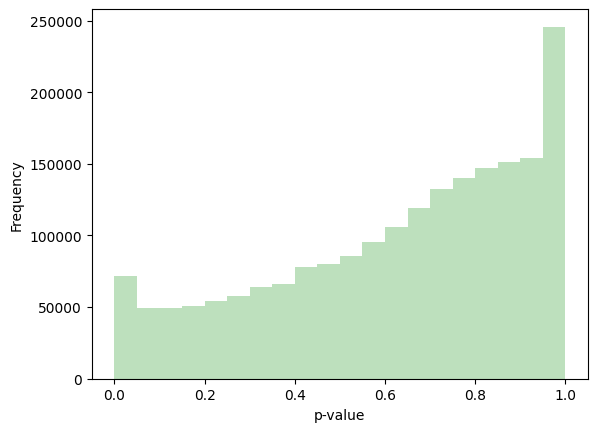

In [7]:
plt.hist(p_values,bins=20,color='#BDE0BD')
plt.xlabel('p-value')
plt.ylabel('Frequency')

In [8]:
test_can=training_can[:,top_x_bin_indices[:3]]
test_con=training_con[:,top_x_bin_indices[:3]]



train_full_ca=training_can[:,top_x_bin_indices]
train_full_co=training_con[:,top_x_bin_indices]

test_full_ca=testing_can[:,top_x_bin_indices]
test_full_co=testing_con[:,top_x_bin_indices]


/tmp/ipykernel_1012/3005455386.py:11: RuntimeWarning: divide by zero encountered in log
  col1_can = np.log(test_can[:, [0]])
/tmp/ipykernel_1012/3005455386.py:12: RuntimeWarning: divide by zero encountered in log
  col2_can = np.log(test_can[:, [1]])
/tmp/ipykernel_1012/3005455386.py:13: RuntimeWarning: divide by zero encountered in log
  col3_can = np.log(test_can[:, [2]])
/tmp/ipykernel_1012/3005455386.py:14: RuntimeWarning: divide by zero encountered in log
  col1_con = np.log(test_con[:, [0]])
/tmp/ipykernel_1012/3005455386.py:15: RuntimeWarning: divide by zero encountered in log
  col2_con = np.log(test_con[:, [1]])
/tmp/ipykernel_1012/3005455386.py:16: RuntimeWarning: divide by zero encountered in log
  col3_con = np.log(test_con[:, [2]])


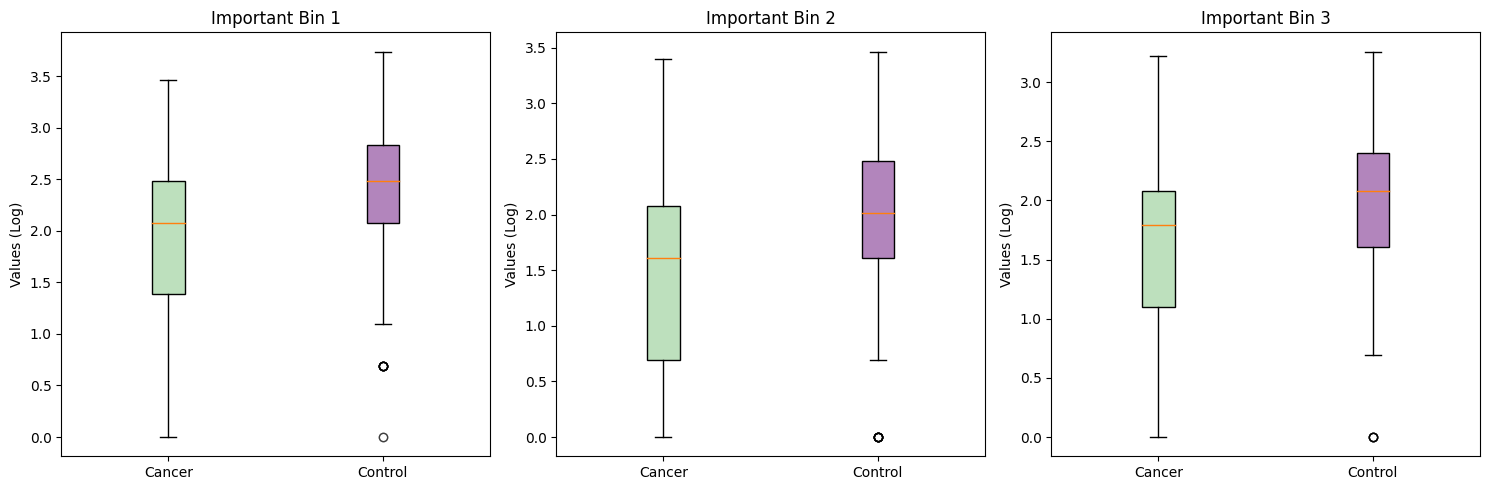

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of columns for the subplots (one for each column)
num_cols = 3

# Create a figure and subplots
fig, axes = plt.subplots(1, num_cols, figsize=(15, 5))

# Sample data (replace this with your actual data)
col1_can = np.log(test_can[:, [0]])
col2_can = np.log(test_can[:, [1]])
col3_can = np.log(test_can[:, [2]])
col1_con = np.log(test_con[:, [0]])
col2_con = np.log(test_con[:, [1]])
col3_con = np.log(test_con[:, [2]])

# Create boxplots for each column (combine "can" and "con" data)
positions = [0, 1]
labels = ['Cancer', 'Control']
colors = ['#BDE0BD', '#B285BC']

for i in range(num_cols):
    bp = axes[i].boxplot([eval(f'col{i+1}_can').flatten(), eval(f'col{i+1}_con').flatten()],
                         positions=positions, vert=True, patch_artist=True, labels=labels)

    # Set box colors
    for box, color in zip(bp['boxes'], colors):
        box.set(facecolor=color)

    # Set flier color (outliers)
    for flier in bp['fliers']:
        flier.set(marker='o', color='black', alpha=0.5)

    axes[i].set_title(f'Important Bin {i+1}')
    axes[i].set_xticks(positions)
    axes[i].set_ylabel('Values (Log)')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

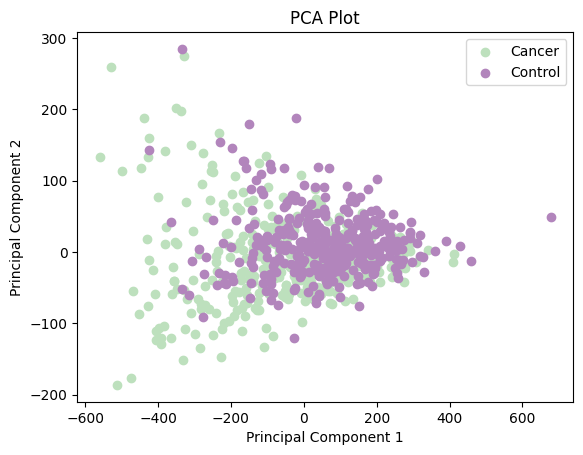

Explained Variance Ratio: [0.17941985 0.0170888 ]


In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
all_data = np.vstack((train_full_ca, train_full_co))

# Perform PCA with desired number of components
n_components = 2
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(all_data)

# Separate the results back into "can" and "con" datasets
can_pca = pca_result[:len(train_full_co)]
con_pca = pca_result[len(train_full_co):]

# Plot the PCA results
plt.scatter(can_pca[:, 0], can_pca[:, 1], color='#BDE0BD', label='Cancer')
plt.scatter(con_pca[:, 0], con_pca[:, 1], color='#B285BC', label='Control')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA Plot')
plt.show()

# Print the explained variance ratio for each component
print('Explained Variance Ratio:', pca.explained_variance_ratio_)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                640064    
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                      

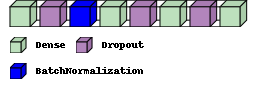

Epoch 1/250


2023-08-18 12:43:01.865627: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 26640000 exceeds 10% of free system memory.


42/42 [==============================] - 3s 25ms/step - loss: 2.8539 - accuracy: 0.5090 - val_loss: 2.5444 - val_accuracy: 0.5946
Epoch 2/250
42/42 [==============================] - 1s 14ms/step - loss: 2.7897 - accuracy: 0.5120 - val_loss: 2.4928 - val_accuracy: 0.6622
Epoch 3/250
42/42 [==============================] - 1s 16ms/step - loss: 2.7358 - accuracy: 0.5420 - val_loss: 2.4552 - val_accuracy: 0.7162
Epoch 4/250
42/42 [==============================] - 1s 19ms/step - loss: 2.7164 - accuracy: 0.5586 - val_loss: 2.4420 - val_accuracy: 0.7162
Epoch 5/250
42/42 [==============================] - 1s 13ms/step - loss: 2.6989 - accuracy: 0.5826 - val_loss: 2.4269 - val_accuracy: 0.7297
Epoch 6/250
42/42 [==============================] - 1s 13ms/step - loss: 2.6794 - accuracy: 0.5796 - val_loss: 2.4026 - val_accuracy: 0.7703
Epoch 7/250
42/42 [==============================] - 1s 13ms/step - loss: 2.6185 - accuracy: 0.6096 - val_loss: 2.3886 - val_accuracy: 0.7703
Epoch 8/250
42/42 

In [20]:
from tensorflow.keras import regularizers
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have control and cancer datasets saved in control_data and cancer_data arrays
# and each array represents a patient.

# Create binary labels (0 for control, 1 for cancer)
control_labels_train = np.zeros(train_full_co.shape[0])
cancer_labels_train = np.ones(train_full_ca.shape[0])
control_labels_test = np.zeros(test_full_co.shape[0])
cancer_labels_test = np.ones(test_full_ca.shape[0])


# Combine the datasets and labels
X_train = np.concatenate((train_full_co, train_full_ca), axis=0)
y_train = np.concatenate((control_labels_train, cancer_labels_train))
X_test=np.concatenate((test_full_co, test_full_ca), axis=0)
y_test = np.concatenate((control_labels_test, cancer_labels_test))

train_indices = np.random.permutation(len(X_train))
X_train_shuffled = X_train[train_indices]
y_train_shuffled = y_train[train_indices]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (optional but can help with training)
scaler = StandardScaler()
X_train_shuffled= scaler.fit_transform(X_train_shuffled)
X_test = scaler.transform(X_test)

from tensorflow.keras.layers import BatchNormalization

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()
from collections import defaultdict
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D
import visualkeras
color_map = defaultdict(dict)
color_map[ tf.keras.layers.Dense]['fill'] = '#BDE0BD'
color_map[ZeroPadding2D]['fill'] = 'gray'
color_map[BatchNormalization]['fill'] = 'blue'
color_map[tf.keras.layers.Dropout]['fill'] = '#B285BC'
color_map[Dense]['fill'] = 'green'
color_map[Flatten]['fill'] = 'teal'

visualkeras.layered_view(model, color_map=color_map,legend=True,to_file='output.png').show()
# Implement learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.96
)
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00005)
from tensorflow.keras.metrics import AUC
# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Implement early stopping
#early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_shuffled, y_train_shuffled, epochs=250, batch_size=16, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

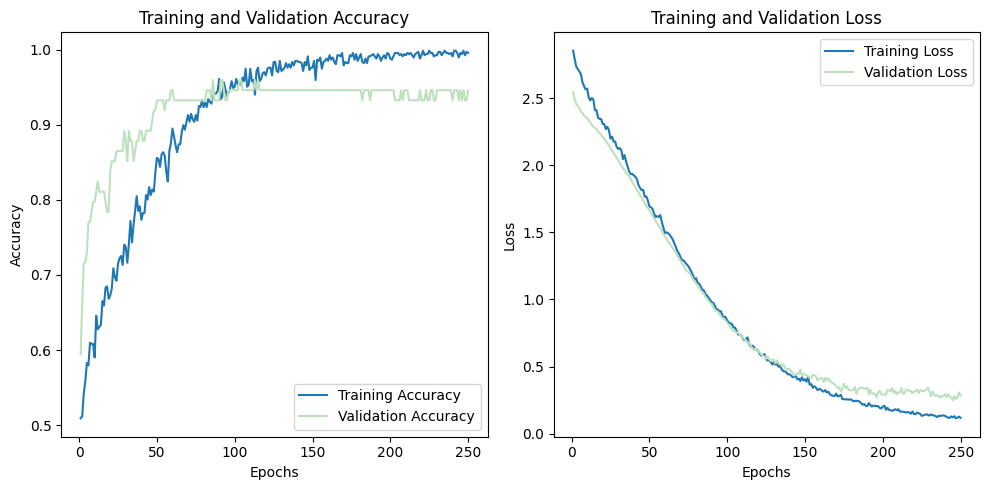

In [22]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create a list of epochs for x-axis
epochs = range(1, len(training_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy',color='#BDE0BD')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss',color='#BDE0BD')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
from sklearn.metrics import roc_auc_score

# Assuming you have already trained your model and obtained predictions on the testing set
y_pred = model.predict(X_test)

# Calculate AUC
auc_score = roc_auc_score(y_test, y_pred)  # Replace y_true with the true labels of the testing set

print(f"AUC on testing set: {auc_score}")

2/2 [==============================] - 0s 6ms/step
AUC on testing set: 0.8188888888888889


In [14]:
y_pred = model.predict(X_test)
srr_numbers =[re.search(r'SRR(\d+)', item).group() for item in test_can_names if re.search(r'SRR\d+', item)]


# Visualize the first input sequence and predicted output
# Assuming your input sequence has one feature per time step
cancer_results=y_pred.flatten()[30:]
print(cancer_results)

print(y_pred)
print(y_test)

2/2 [==============================] - 0s 5ms/step
[0.94058436 0.99998486 0.00867239 0.9987723  0.17078659 0.9962949
 0.9999063  0.9960192  0.9941841  0.9882769  0.998131   0.9642223
 0.30775043 0.03097995 0.2769874  0.14368618 0.95865643 0.04039365
 0.9995639  0.8744399  0.00371107 0.99428517 0.05176976 0.9950747
 0.9999722  0.02118083 0.29283026 0.82620656 0.9991136  0.9999614 ]
[[9.9774480e-01]
 [9.3830931e-01]
 [3.6570237e-03]
 [5.6962762e-03]
 [1.3450610e-02]
 [9.6020299e-01]
 [1.4229653e-03]
 [1.4614578e-03]
 [1.5373331e-01]
 [5.0328666e-04]
 [3.6691048e-03]
 [3.8781017e-02]
 [3.7294568e-03]
 [9.9873656e-01]
 [2.0378712e-03]
 [3.8485462e-03]
 [1.0267876e-02]
 [5.7042873e-01]
 [1.4927663e-03]
 [7.9578713e-02]
 [4.2252410e-03]
 [4.5349128e-03]
 [5.1021520e-02]
 [8.8242535e-03]
 [3.1030953e-03]
 [2.5942742e-03]
 [9.8273349e-01]
 [9.3252504e-01]
 [9.8976862e-01]
 [1.3484186e-03]
 [9.4058436e-01]
 [9.9998486e-01]
 [8.6723939e-03]
 [9.9877232e-01]
 [1.7078659e-01]
 [9.9629492e-01]
 [9.

In [15]:
y=0

wrong_canc,wrong_cont=0,0

for pred in y_pred:
    if pred[0]>=0.5 and y_test[y]!=1:
        wrong_cont+=1
        print(f'This is the actual: {y_test[y]} and the prediction: {pred[0]} and index {y}')
    elif pred[0]<0.5 and y_test[y]!=0:
        wrong_canc+=1
        print(f'This is the actual: {y_test[y]} and the prediction: {pred[0]} and index {y}')
    y+=1
print(wrong_canc,wrong_cont)
print(len(y_test))
        
        

This is the actual: 0.0 and the prediction: 0.9977447986602783 and index 0
This is the actual: 0.0 and the prediction: 0.9383093118667603 and index 1
This is the actual: 0.0 and the prediction: 0.9602029919624329 and index 5
This is the actual: 0.0 and the prediction: 0.998736560344696 and index 13
This is the actual: 0.0 and the prediction: 0.570428729057312 and index 17
This is the actual: 0.0 and the prediction: 0.9827334880828857 and index 26
This is the actual: 0.0 and the prediction: 0.9325250387191772 and index 27
This is the actual: 0.0 and the prediction: 0.9897686243057251 and index 28
This is the actual: 1.0 and the prediction: 0.00867239385843277 and index 32
This is the actual: 1.0 and the prediction: 0.17078658938407898 and index 34
This is the actual: 1.0 and the prediction: 0.3077504336833954 and index 42
This is the actual: 1.0 and the prediction: 0.030979953706264496 and index 43
This is the actual: 1.0 and the prediction: 0.2769874036312103 and index 44
This is the a

In [16]:
df = pd.read_csv(r'df_cancer.txt')
    

# Create a DataFrame

print(df.head)
# List of SRR numbers


# Filter rows where SRR numbers match
filtered_df = df[df['Run'].isin(srr_numbers)]
print(filtered_df.shape)
# Specify the column from which you want to extract values
column_to_extract = 'disease_stage'

# Extract values at the specified column for the filtered rows
extracted_values = filtered_df[column_to_extract].tolist()
missing_srr_numbers = [srr for srr in srr_numbers if srr not in df['Run'].values]

# Print missing SRR numbers
for missing_srr in missing_srr_numbers:
    print("Missing SRR:", missing_srr)
print(missing_srr_numbers)

print(extracted_values)




<bound method NDFrame.head of              Run  Age            disease  AvgSpotLen        Bases     sex  \
0    SRR16993513   51  COLORECTAL CANCER         200   9540660152  female   
1    SRR16993515   64  COLORECTAL CANCER         200  10172110581  female   
2    SRR16993517   72  COLORECTAL CANCER         200  14784355856    male   
3    SRR16993522   65  COLORECTAL CANCER         200  10304869732  female   
4    SRR16993526   48  COLORECTAL CANCER         200  12829432714    male   
..           ...  ...                ...         ...          ...     ...   
626  SRR15505497   52  COLORECTAL CANCER         200  12806618569  female   
627  SRR15505499   57  COLORECTAL CANCER         200  13307816453    male   
628  SRR15505500   82  COLORECTAL CANCER         200  11210586245    male   
629  SRR15505501   58  COLORECTAL CANCER         200  12370999921  female   
630  SRR15505510   83  COLORECTAL CANCER         200  12417652923  female   

    disease_stage         Library Name     re

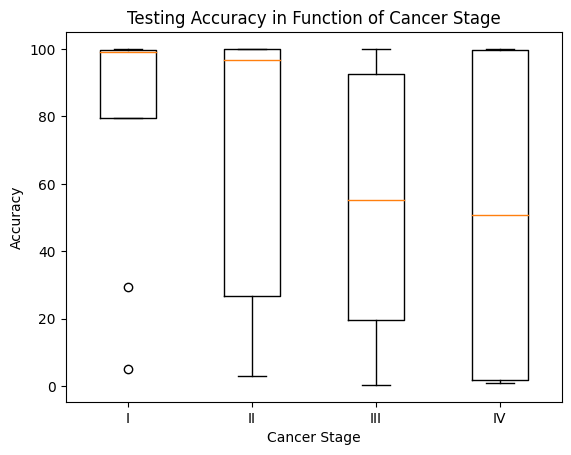

In [17]:
import matplotlib.pyplot as plt

# Sample data
numbers = list(cancer_results*100)
characters = extracted_values

# Create a dictionary to store values for each unique character
data_dict = {}
for char, num in zip(characters, numbers):
    if char not in data_dict:
        data_dict[char] = []
    data_dict[char].append(num)

# Create a list of lists for box plot
data_lists = [data_dict[char] for char in sorted(data_dict.keys())]

# Create a box plot
plt.boxplot(data_lists, labels=sorted(data_dict.keys()))
plt.xlabel('Cancer Stage')
plt.ylabel('Accuracy')
plt.title('Testing Accuracy in Function of Cancer Stage')
plt.show()